In [1]:
from treatment_mask_contouring import *
import pyvista as pv

In [2]:
PATH_DEST = 'masks/'
if not os.path.isdir(PATH_DEST):
    os.makedirs(PATH_DEST)

In [3]:
patient_id_str = input('Insert patient number: ')

Insert patient number: 19


In [4]:
path_CBCTs = '/mnt/iDriveShare/Kayla/CBCT_images/kayla_extracted/' # Path to patient directories

patients = os.listdir(path_CBCTs)
files = [f for f in os.listdir(path_CBCTs) if os.path.isfile(f)]
patients_path = [path_CBCTs+patient+"/" for patient in patients]

ct_path = get_info_CT(patients_path[patients.index(patient_id_str)])
ct_files = [dcm.dcmread(os.path.join(ct_path, f)) for f in os.listdir(ct_path) if 'CT' in f]
path_RS = get_path_RS(ct_path)

# Sort the CT files in ascending order by their image position (z-axis)
ct_files.sort(key=lambda x: x.ImagePositionPatient[2])
ct_file = ct_files[0]
contour_mask = []




------- CURRENTLY WORKING ON SLICE NUMBER 20------


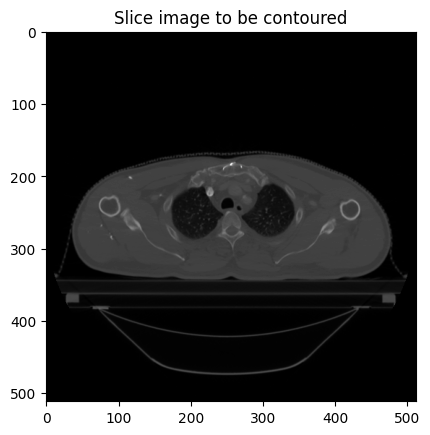

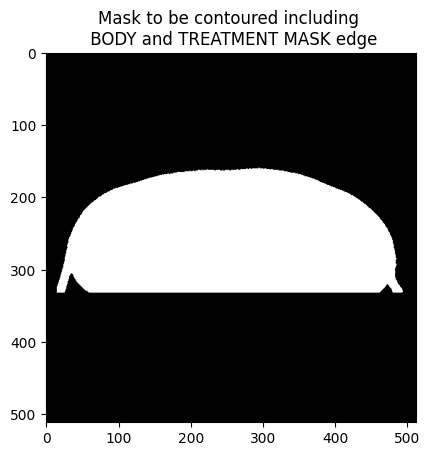

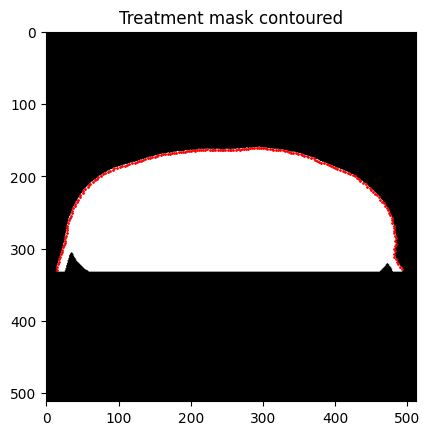

In [6]:
#e.g. h_center,k_center,min_angle,max_angle,min_radius,max_radius,thres_grey = 250,350,-175,-5,55,250,60

contours_params = 250,350,-175,-5,55,250,60

#MINIMUM SLICE WHERE YOU CAN VISUALIZE THE MASK. THIS VALUE CAN BE CHANGED DEPENDING ON EACH IMAGE.
minimum_slice_with_mask= 20
for slice_value in range(minimum_slice_with_mask,len(ct_files)):

    positions = contour_slice(ct_files,ct_path,path_RS,slice_value,contours_params)
    contour_mask = add_coords(positions, ct_path,slice_value,contour_mask)
    

In [6]:
save_mask_contour(contour_mask,patient_id_str)

save at registered/mask/Mask_19.json
